In [ ]:
# sort data into training, validation, test directories
# train: (1000 cat, 1000 dog), validation: (500 cat, 500 dog), test: (500 cat, 500 dog)
# (data from www.kaggle .com/c/dogs-vs-cats/data)
import os, shutil

original_dataset_dir = os.path.join(os.getcwd(), 'dogs-vs-cats') # original directory with Kaggle data
base_dir = os.path.join(os.getcwd(), 'cats_and_dogs_small') # new directory for smaller sorted dataset

os.makedirs(base_dir, exist_ok=True)

# create new train directory
train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)
train_cats_dir = os.path.join(train_dir, 'cats')
os.makedirs(train_cats_dir, exist_ok=True)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.makedirs(train_dogs_dir, exist_ok=True)

# create new validation directory
validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(validation_dir, exist_ok=True)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.makedirs(validation_cats_dir, exist_ok=True)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.makedirs(validation_dogs_dir, exist_ok=True)

# create new test directory
test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)
test_cats_dir = os.path.join(test_dir, 'cats')
os.makedirs(test_cats_dir, exist_ok=True)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.makedirs(test_dogs_dir, exist_ok=True)

# copy pics from old directory to new directory
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [2]:
# verify dataset directory lengths
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [3]:
# create train / validation data generators from jpg files
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

data_batch, labels_batch = train_generator.next()
print('data batch shape:', data_batch.shape)
print('labels batch shape', labels_batch.shape)

Init Plugin
Init Graph Optimizer
Init Kernel
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape: (20, 150, 150, 3)
labels batch shape (20,)


In [ ]:
# build and train convnet model 1
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps=50)

model.save('cats_and_dogs_small_1.h5')

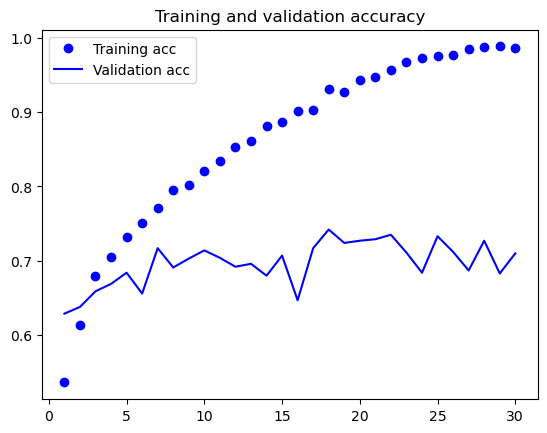

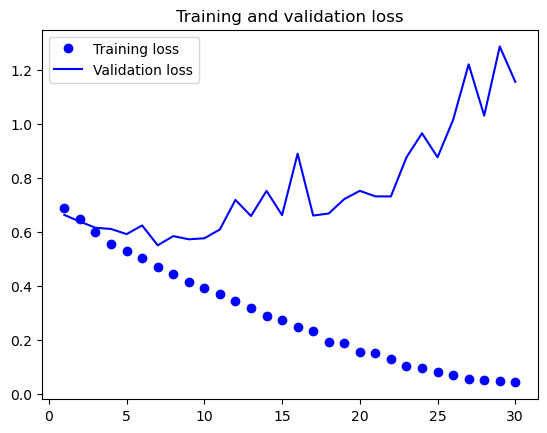

In [28]:
# plot train / validation accuracy and loss
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [29]:
# create new data generators using data augmentation to randomly augment training data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

data_batch, labels_batch = train_generator.next()
print('data batch shape:', data_batch.shape)
print('labels batch shape', labels_batch.shape)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape: (20, 150, 150, 3)
labels batch shape (20,)


In [31]:
# build and train convnet model 2
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=100,
                    validation_data=validation_generator,
                    validation_steps=50)

model.save('cats_and_dogs_small_2.h5')

Epoch 1/100


2022-08-23 06:31:58.332068: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 0.6973 - acc: 0.5035

2022-08-23 06:32:06.459631: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 10s 94ms/step - loss: 0.6973 - acc: 0.5035 - val_loss: 0.6891 - val_acc: 0.5680
Epoch 2/100
100/100 [==============================] - 9s 89ms/step - loss: 0.6891 - acc: 0.5255 - val_loss: 0.6800 - val_acc: 0.5130
Epoch 3/100
100/100 [==============================] - 9s 86ms/step - loss: 0.6782 - acc: 0.5645 - val_loss: 0.6673 - val_acc: 0.5700
Epoch 4/100
100/100 [==============================] - 8s 84ms/step - loss: 0.6630 - acc: 0.6010 - val_loss: 0.6363 - val_acc: 0.6470
Epoch 5/100
100/100 [==============================] - 9s 86ms/step - loss: 0.6475 - acc: 0.6225 - val_loss: 0.6196 - val_acc: 0.6560
Epoch 6/100
100/100 [==============================] - 9s 88ms/step - loss: 0.6294 - acc: 0.6395 - val_loss: 0.6200 - val_acc: 0.6280
Epoch 7/100
100/100 [==============================] - 9s 90ms/step - loss: 0.6257 - acc: 0.6430 - val_loss: 0.6079 - val_acc: 0.6600
Epoch 8/100
100/100 [==============================] - 9s 91ms/step - los

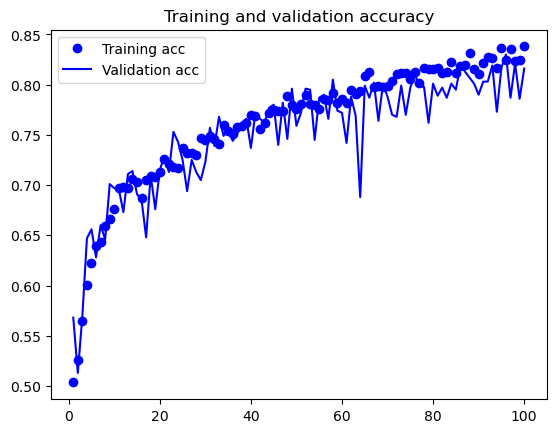

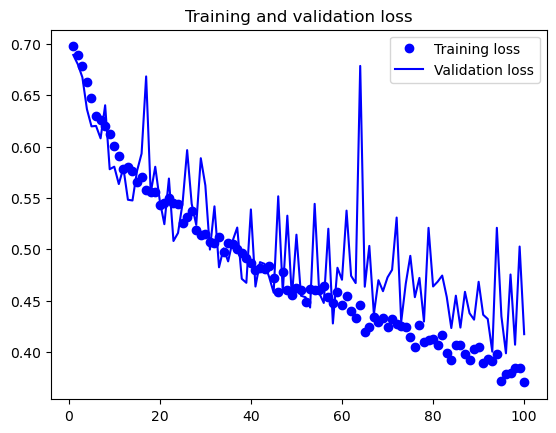

In [32]:
# plot train / validation accuracy and loss
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()